# Week 3: Intro to Python
## Sections

### Merging Dataframes

### Panda Idioms 
- Pandorable Code
- Traditional Coding Approach

### Group by
### Scales

- Ratio
- Interval
- Ordinal
- Nominal

### Pivot Tables

### Date Functionality
- Timestamp
- Period
- DatetimeIndex
- PeriodIndex
- Converting to Datetime
- Time Deltas
- Working with Dates in Dataframes

## Merging Dataframes
Last week, we were introduced to the pandas data manipulation and analysis library. We saw that there is really two-core data structures which are very similar, the one-dimensional series object and the two-dimensional DataFrame object. Querying these two data structures is done in a few different ways, such as using the iloc or loc attributes for row-based querying, or using the square brackets on the object itself for column-based querying. Most importantly, we saw that one can query the DataFrame and Series objects through Boolean masking. And Boolean masking is a powerful filtering method which allows us to use broadcasting to determine what data should be kept in our analysis.

In this week's lecture, we're going to go into more detail on how to manipulate DataFrame, in particular. We're going to explore how to reduce and process data using GroupBy and Apply, and how to join data sets from multiple files together into one. We'll also talk about some features that pandas has which are useful for both traditional statistical analyses and machine learning. Let's start with how to merge data sets. We've already seen how we add new data to an existing DataFrame. We simply use the square bracket operator with the new column name, and the data is added as long as an index is shared. If there is no shared index and a scalar value is passed in, which remember a scalar value is just a single value like an integer or a string. The new value column is added with the scalar value as the default value. What if we wanted to assign a different value for every row? Well, it gets trickier. If we could hardcode the values into a list, then pandas will unpack them and assign them to the rows. But if the list we have isn't long enough, then we can't do this, since Pandas doesn't know where the missing values should go.

Here's an example. We used the DataFrame of store purchases from one of our previous lectures, where the index is a list of stores and the columns store purchase data. 

In [2]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


If we want to add some new column called Date to the DataFrame, that's fine. We just use the square bracket operator directly on the DataFrame, as long as the column is as long as the rest of the records. 

In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


If we want to add some new field, may be a delivery flag, that's easy too since it's a scalar value.

In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


The problem comes in when we have only a few items to add. In order for this to work, we have to supply pandas the list which is long enough for the DataFrame, so that each row could be populated. This means that we have to input none values ourselves. 

In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


If each of our rows has a unique index, then we could just assign the new column identifier to the series. For instance, if we reset the index in this example so the DataFrame is labeled from 1 through 2, then we create a new series with these labels, we can apply it. And the results we get are as we expected. The nice aspect of this approach is that we could just ignore the items that we don't know about, and pandas will put missing values in for us. So this is a really nice way to do it. 

In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


More commonly, we want to join two larger DataFrames together, and this is a bit more complex. Before we jump into the code, we need to address a little relational theory, and to get some language conventions down. 

This is a Venn Diagram. 
<img src='C:\Users\dfitzgerald\Documents\MyCourses\IntrotoDataScienceinPython\StudentStaffVenn.png'>


A Venn Diagram is traditionally used to show set membership. For example, the circle on the left is the population of students at a university. The circle on the right is the population of staff at a university. And the overlapping region in the middle are all of those students who are also staff. Maybe these students run tutorials for a course, or grade assignments, or engage in running research experiments. 

Okay, so let's see an example of how we would do this in pandas, where we would use the merge function.

First we create two DataFrames, staff and students. There's some overlap in these DataFrames, in that James and Sally are both students and staff, but Mike and Kelly are not. Importantly, both DataFrames are indexed along the value we want to merge them on, which is called Name.

In [3]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


We could think of these two populations as indices in separate DataFrames, maybe with the label of Person Name. When we want to join the DataFrames together, we have some choices to make. First what if we want a list of all the people regardless of whether they're staff or student, and all of the information we can get on them? In database terminology, this is called a full outer join. And in set theory, it's called a union. In the Venn diagram, it represents everyone in any circle.

If we want the union of these, we would call merge passing in the DataFrame on the left and the DataFrame on the right, and telling merge that we want it to use an outer join. We tell merge that we want to use the left and right indices as the joining columns.

We see in the resulting DataFrame that everyone is listed. And since Mike does not have a role, and Kelley does not have a school, those cells are listed as missing values.

In [7]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


It's quite possible though that we only want those people who we have maximum information for, those people who are both staff and students. In database terminology, this is called an inner join. Or in set theory, the intersection. And this is represented in the Venn diagram as the overlapping parts of each circle.

 If we wanted to get the intersection, that is, just those students who are also staff, we could set the how attribute to inner. And we set the resulting DataFrame has only James and Sally in it.

In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


Now there are two other common use cases when merging DataFrames. Both are examples of what we would call set addition. The first is when we would want to get a list of all staff regardless of whether they were students or not. But if they were students, we would want to get their student details as well. To do this we would use a left join.

In [4]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


You could probably guess what comes next. We want a list of all of the students and their roles if they were also staff. To do this we would do a right join. The merge method has a couple of other interesting parameters. First, you don't need to use indices to join on, you can use columns as well. Here's an example.

In [7]:
pd.merge(staff_df, student_df,how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


So what happens when we have conflicts between the DataFrames? Let's take a look by creating new staff and student DataFrames that have a location information added to them. In the staff DataFrame, this is an office location where we can find the staff person. And we can see the Director of HR is on State Street, while the two students are on Washington Avenue. But for the student DataFrame, the location information is actually their home address.

In [9]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


The merge function preserves this information, but appends an _x or _y to help differentiate between which index went with which column of data. The _x is always the left DataFrame information, and the _ y is always the right DataFrame information. And you could control the names of _x and _y with additional parameters if you want to. Now you try it. Here's a DataFrame of products and invoices. The product has an identifier and a sticker price. The invoice lists the people, products, identifiers, and quantity. Assuming that we want to generate totals, how do we join these two DataFrames together so that we have one which lists all of the information we need?

In [10]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


Here are two DataFrames, products and invoices. The product DataFrame has an identifier and a sticker price. The invoices DataFrame lists the people, product identifiers, and quantity. Assuming that we want to generate totals, how do we join these two DataFrames together so that we have one which lists all of the information we need?

In [22]:
products_df = pd.DataFrame([{'Product ID': '4109', 'Price': 5, 'Product': 'Sushi Roll'},
                         {'Product ID': '1412', 'Price': 0.5, 'Product': 'Egg'},
                         {'Product ID': '8931', 'Price': 1.5, 'Product': 'Bagel'}])
invoices_df = pd.DataFrame([{'Customer': 'Ali', 'Product ID':'4109', 'Qty':1},
                           {'Customer': 'Eric', 'Product ID':'1412', 'Qty':12},
                           {'Customer': 'Ande', 'Product ID':'8931', 'Qty':6},
                           {'Customer': 'Sam', 'Product ID':'4109', 'Qty':2}])
merged_df = pd.merge(products_df, invoices_df, how='inner', left_on=['Product ID'], right_on=['Product ID'])
merged_df['Total'] = merged_df['Price'] * merged_df['Qty']
merged_df

,Product ID,Price,Product,Customer,Qty,Total
0,4109,5.0,Sushi Roll,Ali,1,5.0
1,4109,5.0,Sushi Roll,Sam,2,10.0
2,1412,0.5,Egg,Eric,12,6.0
3,8931,1.5,Bagel,Ande,6,9.0


## Pandas Idioms
Python programmers will often suggest that there many ways the language can be used to solve a particular problem. But that some are more appropriate than others. The best solutions are celebrated as Idiomatic Python and there are lots of great examples of this on stack overflow and websites.

An idiomatic solution is often one which has both high performance and high readability. This isn't necessarily true. A sort of sub-language within Python, Pandas has its own set of idioms. We've alluded to some of these already, such as using vectorization whenever possible, and not using iterative loops if you don't need to. Several developers and users within the Panda's community have used the term pandorable for these idioms. I think it's a great term. So, I wanted to share with you a couple of key features of how you can make your code pandorable.

The first of these is called method chaining. Now we saw that previously, you could chain pandas calls together when you're querying DataFrames. For, instance if you wanted to select rows based on index like county name. Then you wanted to only project certain columns like the total population, you can write a query, like df.loc[“Washtenaw”][“Total Population”] This is a form of chaining, called chain indexing. And it's generally a bad practice. Because it's possible that pandas could be returning a copy or a view of the DataFrame depending upon the underlying NumPy library. In his descriptions of idiomatic Pandas patterns developer Tom Osberger described a rule of thumb for this. If you see back to back square brackets, then you should think carefully if you want to be doing chain indexing. I think this is great as a sort of code smell or anti pattern.

In [3]:
import pandas as pd
inputFile = 'C:/Users/dfitzgerald/Documents/MyCourses/IntrotoDataScienceinPython/coursedownloads/census.csv'
df = pd.read_csv(inputFile)
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


Method chaining though, little bit different. The general idea behind method chaining is that every method on an object returns a reference to that object. The beauty of this is that you can condense many different operations on a DataFrame, for instance, into one line or at least one statement of code. 

Here's an example of two pieces of code in pandas using our census data. 
### Pandorable Code
The first is the pandorable way to write the code with method chaining. In this code, there's no in place flag being used and you can see that when we first run a where query, then a dropna, then a set_index, and then a rename. You might wonder why the whole statement is enclosed in parentheses and that's just to make the statement more readable. In Python, if you begin with an open parentheses, you can span a statement over multiple lines and things read a little bit nicer. 

In [4]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

### Traditional Coding Approach
The second example is a more traditional way of writing code. There's nothing wrong with this code in the functional sense, you might even be able to understand it better as a new person to the language. It's just not as pandorable as the first example. Now, the key with any good idiom is to understand when it isn't helping you. In this case, you can actually time both methods and see that the latter method is faster. So, this is a particular example of a classic time readability trade off.

In [5]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

You'll see lots of examples on stock overflow and in documentation of people using method chaining in their pandas. And so, I think being able to read and understand the syntax is really worth your time. 

Here's another pandas idiom. Python has a wonderful function called <b>`map`</b>, which is sort of a basis for functional programming in the language. When you want to use <b>`map`</b> in Python, you pass it some function you want called, and some iterable, like a list, that you want the function to be applied to. The results are that the function is called against each item in the list, and there's a resulting list of all of the evaluations of that function.

Python has a similar function called applymap. In applymap, you provide some function which should operate on each cell of a DataFrame, and the return set is itself a DataFrame. Now I think applymap is fine, but I actually rarely use it. Instead, I find myself often wanting to map across all of the rows in a DataFrame. And pandas has a function that I use heavily there, called apply. Let's look at an example.

Let's take our census DataFrame. In this DataFrame, we have five columns for population estimates. Each column corresponding with one year of estimates. It's quite reasonable to want to create some new columns for minimum or maximum values, and the apply function is an easy way to do this.

First, we need to write a function which takes in a particular row of data, finds a minimum and maximum values, and returns a new row of data. We'll call this function min_max, this is pretty straight forward. We can create some small slice of a row by projecting the population columns. Then use the NumPy min and max functions, and create a new series with a label values represent the new values we want to <b>`apply`</b>.

In [6]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

Then we just need to call <b>`apply`</b> on the DataFrame. <b>`apply`</b> takes the function and the axis on which to operate as parameters. Now, we have to be a bit careful, we've talked about axis zero being the rows of the DataFrame in the past. But this parameter is really the parameter of the index to use. So, to apply across all rows, you pass axis equal to one. 

In [7]:
df.apply(min_max, axis=1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

Of course there's no need to limit yourself to returning a new series object. If you're doing this as part of data cleaning your likely to find yourself wanting to add new data to the existing DataFrame. In that case you just take the row values and add in new columns indicating the max and minimum scores. This is a regular part of my workflow when bringing in data and building summary or descriptive statistics. And is often used heavily with the merging of DataFrames.

In [9]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

Okay, this is all great, and apply is an extremely important tool in your toolkit. But this lecture wasn't really supposed to be about the new features of the API, but about making pandorable code. The reason I introduced <b>`apply`</b> here is because you rarely see it used with large function definitions, like we did. Instead, you typically see it used with <b>`lambdas`</b>. Now, you'll recall from the first week of this course that knowing <b>`lambdas`</b> isn't a requirement of the course. But to get the most of the discussions you'll see online, you're going to need to know how at least read <b>`lambdas`</b>. Here's a one line example of how you might calculate the max of the columns using the apply function. You can imagine how you might chain several apply calls with <b>`lambdas`</b> together to create a readable yet succinct data manipulation script.

In [10]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

So there are a couple of pandas idioms. But I think there's many more, and I haven't talked about them here. So here's an unofficial assignment for you. Go look at some of the top ranked questions on pandas on Stack Overflow, and look at how some of the more experienced authors, answer those questions. Do you see any interesting patterns? Chime in on the course discussion forums and let's build some pandorable documents together.

## Group by
We've seen that even though PANDAS allows us to iterate over every row in a data frame this is generally a slow way to accomplish a given task and it's not very pandorable. For instance, if we wanted to write some code to iterate over all the of the states and generate a list of the average census population numbers. We could do so using a loop in the unique function. Another option is to use the dataframe group by function. This function takes some column name or names and splits the dataframe up into chunks based on those names, it returns a dataframe group by object. Which can be iterated upon, and then returns a tuple where the first item is the group condition, and the second item is the data frame reduced by that grouping. Since it's made up of two values, you can unpack this, and project just the column that you're interested in, to calculate the average.

Here's some examples of both methods in action. Let's first load the census data, then exclude the state level summarizations, which had a sum level value of 40. Here's some examples of both methods in action. Let's first load the census data, then exclude the state level summarizations which had a sum level of 40. In the first we used the census date. We get a list of the unique states. Then for each state we reduce the data frame and calculate the average.

In [12]:
import pandas as pd
import numpy as np
inputFile = 'C:/Users/dfitzgerald/Documents/MyCourses/IntrotoDataScienceinPython/coursedownloads/census.csv'
df = pd.read_csv(inputFile)
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


If we time this we see it takes a while. I've set the number of loops here the time it should take to ten because I'm live loading.

In [13]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an avera

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of

Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population 

Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Islan

Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyomi

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population

Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population 

Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania hav

Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state Wes

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an av

Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population

Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average popul

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Here's the same approach with a group by object. We tell pandas we're interested in group and with a state name and then we calculate the average using just one column and all of the data in that column. When we time it we see a huge difference in the speed

In [14]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state W

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of

Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have 

Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population

Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average populati

Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average populatio

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average

Now, 99% of the time, you'll use group by on one or more columns. But you can actually provide a function to group by as well and use that to segment your data. This is a bit of a fabricated example but lets say that you have a big batch job with lots of processing and you want to work on only a third or so of the states at a given time. We could create some function which returns a number between zero and two based on the first character of the state name. Then we can tell group by to use this function to split up our data frame. It's important to note that in order to do this you need to set the index of the data frame to be the column that you want to group by first.

Here's an example. We'll create some new function called fun and if the first letter of the parameter is a capital M we'll return a 0. If it's a capital Q we'll return a 1 and otherwise we'll return a 2. Then we'll pass this function to the data frame reply, and see that the data frame is segmented by the calculated group number. This kind of technique, which is sort of a light weight hashing, is commonly used to distribute tasks across multiple workers. Whether they are cores in a processor, nodes in a supercomputer, or disks in a database. A common work flow with group bias that you split your data, you apply some function, then you combine the results. This is called split apply combine pattern. And we've seen the splitting method, but what about apply? Certainly iterative methods as we've seen can do this, but the groupby object also has a method called agg which is short for aggregate. This method applies a function to the column or columns of data in the group, and returns the results.

In [15]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [16]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + 
          ' records in group ' + 
          str(group) + 
          ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


With agg, you simply pass in a dictionary of the column names that you're interested in, and the function that you want to apply. For instance to build a summary data frame for the average populations per state, we could just give agg a dictionary with the Census 2010 pop key and the numb/pie average function.

In [17]:
inputFile = 'C:/Users/dfitzgerald/Documents/MyCourses/IntrotoDataScienceinPython/coursedownloads/census.csv'
df = pd.read_csv(inputFile)
df = df[df['SUMLEV']==50]

In [18]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


Now, I want to flag a potential issue and using the aggregate method of group by objects. You see, when you pass in a dictionary it can be used to either to identify the columns to apply a function on or to name an output column if there's multiple functions to be run. The difference depends on the keys that you pass in from the dictionary and how they're named.

In short, while much of the documentation and examples will talk about a single groupby object, there's really two different objects. The data frame groupby and the series groupby. And these objects behave a little bit differently with aggregate.

In [19]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


For instance, we take our census data and convert it into a series with the state names as the index and only columns as the census 2010 population. And then we can group this by index using the level parameter. Then we call the agg method where the dictionary that has both the <b>`numpy`</b> average and the <b>`numpy`</b> sum functions. PANDAS applies those functions to the series object and, since there's only one column of data It apples both functions to that column and prints out the output.

In [20]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Users\dfitzgerald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


We can do the same thing with a data frame instead of a series. We set the index to be the state name, we group by the index, and we project two columns. The population estimate in 2010, the population estimate in 2011. When we call aggregate with two parameters, it builds a nice hierarchical column space and all of our functions are applied. Where the confusion can come in is when we change the labels of the dictionary we passed to aggregate, to correspond to the labels in our group data frame. In this case, pandas recognizes that they're the same and maps the functions directly to columns instead of creating a hierarchically labeled column. From my perspective this is very odd behavior, not what I would expect given the labeling change. So just be aware of this when using the aggregate function.

In [21]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Users\dfitzgerald\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [22]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


So that's the group by function. I use the group by function regularly in my work, and it's very handy for segmenting a data frame, working on small pieces of the data frame, and then creating bigger data frames later.

## Scales
Now that we've covered many of the mechanics of Pandas, I want to stop and talk for a moment about data types and scales. We've already seen that Pandas supports a number of different computational data types such as strings, integers and floating point numbers. What this doesn't capture is what we call the scale of the data.

Let's say that we have a data frame of students and their academic levels such as being in grade 1 or grade 2 and grade 3. There's a difference between a student in grade 1 and a student in grade 2, the same as the difference between a student in grade 8 and a student in grade 9. Well let's think about the final exam scores these students might get on assignments. Is the difference between an A and an A minus the same as the difference between an A minus and a B plus? At the University of Michigan at least, the answer is usually no.

We've intuitively seen some different scales, and as we move through data cleaning and statistical analysis and machine learning, it's important to clarify our knowledge and terminology. As a data scientist there four scales that it's worth knowing.

### Ratio Scale
The first is a ratio scale. In the ratio scale the measurements units are equally spaced and mathematical operations, such as subtract, division, and multiplication are all valid. Good examples of ratio scale measurements might be the height and weight.

### Interval Scale
The next scale is the interval scale. In the interval scale the measurement units are equally spaced like the ratio scale. But there's no clear absence of value. That is there isn't a true zero, and so operation such as multiplication and division are not valid.

An example of the interval scale might be the temperatures measured in Celsius or Fahrenheit. Since there's never an absence of temperature and 0 degrees is a meaningful value of temperature.

The direction on a campus might be another good example where 0 degrees on the campus doesn't indicate a lack of direction.

For most of the work you do at data mining, the differences between the ratio and interval scales might not be clearly apparent or important than the algorithm you're applying. But it's important to have this clear in your mind when you're applying advanced statistical tests.

### Ordinal Scale
The next scale is the ordinal scale, and this is also important. In the ordinal scale the order of values is important but the differences between the values are not equally spaced. Here is a grading method that is used in many classes at the University of Michigan as a great example, where letter grades are given with pluses and minuses. But when you compare this to percentage values you see that a letter by itself covers 4% of the available grades and that a letter with a plus or minus is usually just 4% for the available grades. Based on this, it would be odd if there were as many students who received an A plus or A minus as there were who received a straight A.
Ordinal data is very common in machine learning and can sometimes be a challenge to work with.

### Nominal Scale
The last scale I'll mention is the nominal scale which is often just called categorical data. Here the names of teams in a sport might be good example. There are a limited number of teams but changing their order or playing mathematical function to them is meaningless.

Categorical values are very common and we generally refer to categories where there are only two possible values as binary.

So why did I stop talking about Pandas and jump into this discussion of scale. Well, given how important they are in statistics and machine learning, Pandas has a number of interesting functions to deal with converting between measurement scales. Let's start first with nominal data, which in Pandas is called categorical data. Panda is actually has a built in type for categorical data and you could set a column of your data to categorical data by using the as type method. As type tries to change the underlying type of your data, in this case to category data. You can further change this to ordinal data by passing in an ordered flags set to true and passing in the categories in an ordered fashion. Here's an example. Let's create a data frame of letter grades in the descending order. We can also set an index value of some more course grain measure.

In [1]:
import pandas as pd
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


Now when we instruct Pandas to render this as categorical data, we see that the D type has been set as category and that there are 11 different categories.

In [14]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

If we want to indicate to Pandas that this data is in a logical order, we pass the ordered equals true flag and we see those reflected in the category D type using the less than sign. What can you do with this? Well, ordinal data has ordering so it can help you with the Boolean masking. For instance, if we have our list of grades and we compared them with a C. If we did this lexographically, we would that a C+ and a C- are both actually greater than a C.

In [20]:
from pandas.api.types import CategoricalDtype
grades = df['Grades'].astype(CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True))

Instead of coding each of these to something which is lexographical, like a number, we can indicate that there's a clear order to the data. And then broadcasting will work as we expect. We can then use a certain set of mathematical operators like minimum, maximum and others on the ordinal data.

Sometimes it's useful to represent categorical values as each being a column with a true or a false as to whether that category applies. This is especially common in feature extraction, which is a topic in the third course in this specialization.

In [21]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

Variables with a Boolean value are typically called dummy variables. And pandas has a built-in function called get dummies, which will convert the values of a single column into multiple columns of 0's and 1's, indicating the presence of a dummy variable.

There's one more function on scales that I'd like to talk about. And that's on reducing a value which is on the interval or ratio scale, like a number grade, into one that is categorical like a letter grade. Now, this might seem a bit counter intuitive to you since you're losing information about the value. But it's useful on a couple of places. First, if you're visualizing the frequencies of categories, and this can be an extremely useful approach and histograms are regularly used with converted interval or racial data. And we'll take a look at histograms in the second course in this specialization.

Second, if you're using a machine learning classification approach on data, then you need to be using categorical data. So reducing dimensionality is useful there too. panda says a function called cut, which takes in argument which is some real like structure of a column or a data frame or a series. It also takes a number of bins to be used and all bins are kept at equal spacing. Let's go back to our census data for an example. We saw that we could group by state, then aggregate to get a list of the average county size by state. If we further apply cut to this with say 10 bins, we can see that the states listed as categoricals using the average county size. Here we see the states like Alabama and Alaska fall into the same category, while California and the District of Colombia fall into a very different category. Now, cutting is just one way to build categories from your data, and there's many other methods. For instance, cut gives you interval data, where the spacing between each category is equal sized. But sometimes you want to form categories based on frequency. You want the number of items in each bin to be the same, instead of the spacing between bins. It really depends on the shape of your data and what you're planning to do with it. And we'll look at some examples of this in the graphing and charting course for those of you who are enrolled in the specialization. That's it for this module of the course. There's a programming assignment to test your knowledge of this module's content and I'll see you back in the next module as a wrap up where we'll talk more about statistics and set up some basics for comparing results of analysis.

In [23]:
import numpy as np
inputFile = 'C:/Users/dfitzgerald/Documents/MyCourses/IntrotoDataScienceinPython/coursedownloads/census.csv'
df = pd.read_csv(inputFile)
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

C:\Users\dfitzgerald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

## Pivot Tables
A pivot table is a way of summarizing data in a data frame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a data frame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value. A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows you to be able to see the relationship between two variables at just a glance. 

Let's take a look at an example. Here we'll load a new data set, cars.csv. This data set comes from the Open Data Initiative of the Canadian government. And has information about the efficiency of different electric cars which are available for purchase. When we look at the head of the data frame, we'll see that there are model years, vendors, sizes of cars, and statistics, like how big the battery is in kilowatt hours. 

In [26]:
inputFile = 'C:/Users/dfitzgerald/Documents/MyCourses/IntrotoDataScienceinPython/coursedownloads/cars.csv'
df = pd.read_csv(inputFile)
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


A pivot table allows us to pivot out one of these columns into a new column headers and compare it against another column as row indices. For instance, let's say we wanted to compare the makes of electric vehicles versus the years and that we wanted to do this comparison in terms of battery capacity. To do this, we tell pandas we want the values to be kilowatts, the index to be the year and the columns to be the make. Then we specify that the aggregation function, and here we'll use the NumPy mean. Here's the results. We see there are NaN values for vendors who didn't have an entry in a given year like Ford in 2012. And we see that most vendors don't have a change in battery capacity over the years, except for Tesla, as they've introduced several new models.

In [27]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


Now, pivot tables aren't limited to one function that you might want to apply. You can pass aggfunc, a list of the different functions to apply, and pandas will provide you with the result using hierarchical column names. Here, I’ll also pass margins equals true. And that you can see for each of the functions there's now an all category, which shows the overall mean and the minimum values for a given year and a given vendor.

In [28]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35



So that's pivot tables. This has been a pretty short description, but they're incredibly useful when dealing with numeric data. And of course, you can pass any function you want to the aggregate function, including those that you define yourself

## Date Functionality
Welcome to today's tutorial, where we'll be looking at the time series and date functionally in pandas.

Pandas has four main time related classes. 
- Timestamp
- DatetimeIndex
- Period
- PeriodIndex. 

In [29]:
import pandas as pd
import numpy as np

### Timestamp
First, let's look at Timestamp. Timestamp represents a single timestamp and associates values with points in time.

For example, let's create a timestamp using a string 9/1/2016 10:05AM, and here we have our timestamp. Timestamp is interchangeable with Python's datetime in most cases.

In [30]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period
Suppose we weren't interested in a specific point in time, and instead wanted a span of time. This is where Period comes into play.

Period represents a single time span, such as a specific day or month.

In [31]:
pd.Period('1/2016')

Period('2016-01', 'M')

Here we are creating a period that is January 2016, and here's an example of a period that is March 5th, 2016. The index of a timestamp is DatetimeIndex. Let's look at a quick example.

First, let's create our example series t1, we'll use the Timestamp of September 1st, 2nd and 3rd of 2016.

In [32]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex
When we look at the series, each Timestamp is the index and has a value associated with it, in this case, a, b and c.

In [33]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

Looking at the type of our series index, we see that it's DatetimeIndex.

In [34]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex
Similarly, the index of period is PeriodIndex.

Let's create another example series t2. This time, we'll use the values d, e, and f and match them with the period September, October and November 2016.

In [35]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

Looking at the type of the ts2.index, we can see that it's PeriodIndex. Now, let's look into how to convert to Datetime.


In [36]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime
Suppose we have a list of dates as strings.

If we create a DataFrame using these dates as the index. And some randomly generated data, this is the DataFrame we get.

Looking at the index we can see that it’s pretty messy and the dates are all in different formats.

In [37]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,14,25
"Aug 29, 2014",68,14
2015-06-26,83,48
7/12/16,86,84


Using pandas to_datetime, pandas will try to convert these to Datetime and put them in a standard format.

In [38]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,14,25
2014-08-29,68,14
2015-06-26,83,48
2016-07-12,86,84


to_datetime also has options to change the date parse order. For example, we can pass in the argument dayfirst = True to parse the date in European date format.

In [39]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas
Timedeltas are differences in times. We can see that when we take the difference between September 3rd and September 1st, we get a Timedelta of two days.

In [40]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

We can also do something like find what the date and time is for 12 days and three hours past September 2nd, at 8:10 AM.

In [41]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe
Next, let's look at a few tricks for working with dates in a DataFrame.

Suppose we want to look at nine measurements, taken bi-weekly, every Sunday, starting in October 2016. Using date_range, we can create this DatetimeIndex.

Now, let's create a DataFrame using these dates, and some random data, and see what we can do with it.

In [42]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

First, we can check what day of the week a specific date is. For example, here we can see that all the dates in our index are on a Sunday.

In [43]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,105,127
2016-10-16,102,121
2016-10-30,103,126
2016-11-13,99,124
2016-11-27,99,120
2016-12-11,95,122
2016-12-25,94,129
2017-01-08,95,124
2017-01-22,102,116


In [44]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

We can use diff to find the difference between each date's value.

In [45]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-3.0,-6.0
2016-10-30,1.0,5.0
2016-11-13,-4.0,-2.0
2016-11-27,0.0,-4.0
2016-12-11,-4.0,2.0
2016-12-25,-1.0,7.0
2017-01-08,1.0,-5.0
2017-01-22,7.0,-8.0


Suppose we wanted to know what the mean count is for each month in our DataFrame.

We can do this using resample.

In [46]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,103.333333,124.666667
2016-11-30,99.000000,122.000000
2016-12-31,94.500000,125.500000
2017-01-31,98.500000,120.000000


We can use partial string indexing to find values from a particular year, 

In [47]:
df['2017']

,Count 1,Count 2
2017-01-08,95,124
2017-01-22,102,116


or from a particular month, 

In [48]:
df['2016-12']

,Count 1,Count 2
2016-12-11,95,122
2016-12-25,94,129


or we can even slice on a range of dates. For example, here we only want the values from December 2016 onwards.

In [49]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,95,122
2016-12-25,94,129
2017-01-08,95,124
2017-01-22,102,116


Another cool thing we can do is change the frequency of our dates in our DataFrame using asfreq.

If we use this to change the frequency from bi-weekly to weekly, we'll end up with missing values every other week. So let's use the forward fill method on those missing values.

In [50]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,105,127
2016-10-09,105,127
2016-10-16,102,121
2016-10-23,102,121
2016-10-30,103,126
2016-11-06,103,126
2016-11-13,99,124
2016-11-20,99,124
2016-11-27,99,120
2016-12-04,99,120


One last thing I wanted to briefly touch upon is plotting time series.

Importing matplotlib.pyplot, and using the iPython magic %mapplotlib inline, will allow you to visualize the time series in the notebook.

In the next course, we will learn more about understanding and creating visualizations. Thanks for watching, see you next time.

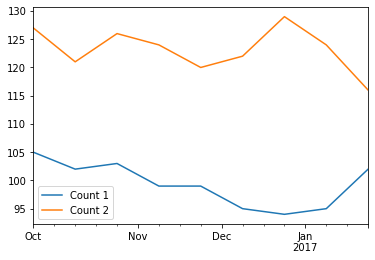

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()